<a href="https://colab.research.google.com/github/yucellgereklioglu/datasciencework/blob/main/kredi_riski_ve_gelir_da%C4%9F%C4%B1l%C4%B1m%C4%B1_veri_analiti%C4%9Fi_%C3%A7al%C4%B1%C5%9Fmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,RandomizedSearchCV
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,recall_score
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt



In [3]:
df=pd.read_csv('/content/kredi riski sql sorgu')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,35,95000,MORTGAGE,10.0,HOMEIMPROVEMENT,A,15000,7.2,0,0.16,N,7
1,42,120000,OWN,15.0,MEDICAL,A,20000,6.8,0,0.17,N,10
2,30,75000,RENT,7.0,PERSONAL,B,10000,11.0,0,0.13,N,5
3,29,68000,MORTGAGE,6.0,EDUCATION,B,11000,10.2,0,0.16,N,4
4,38,110000,OWN,12.0,VENTURE,A,18000,7.0,0,0.16,N,9


<Axes: >

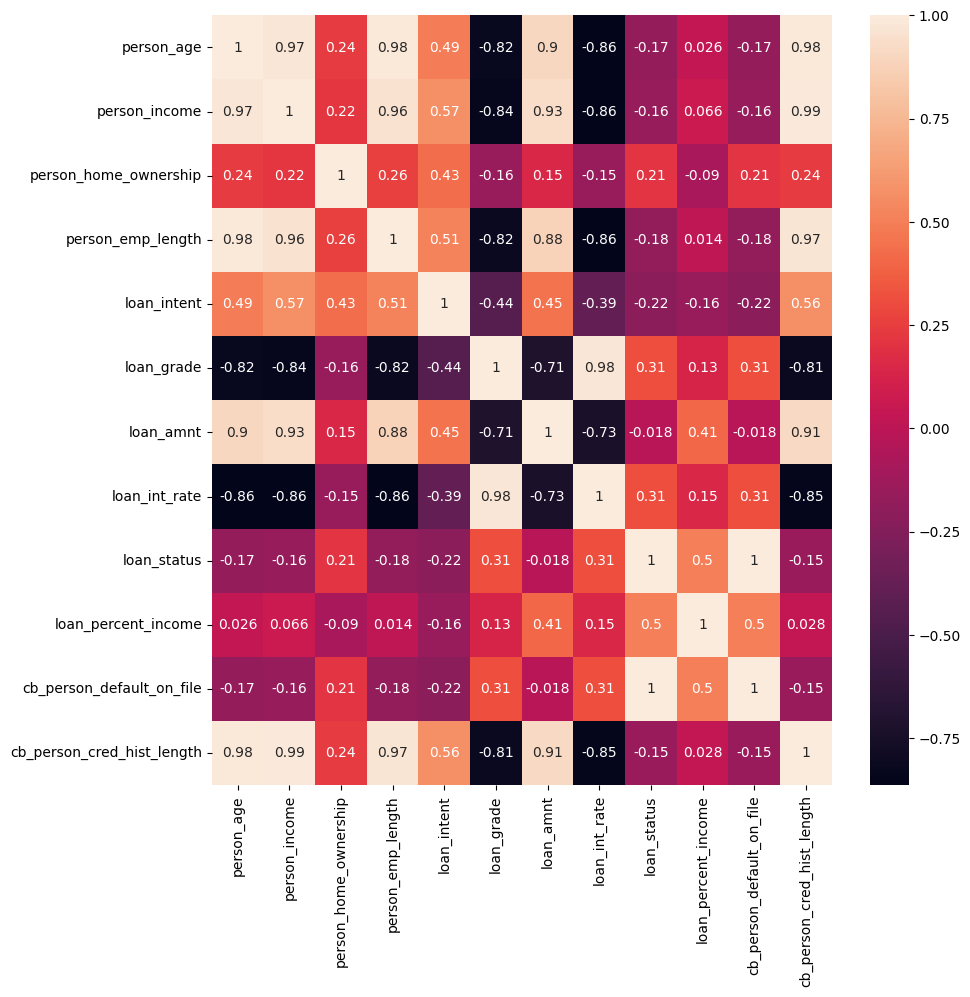

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

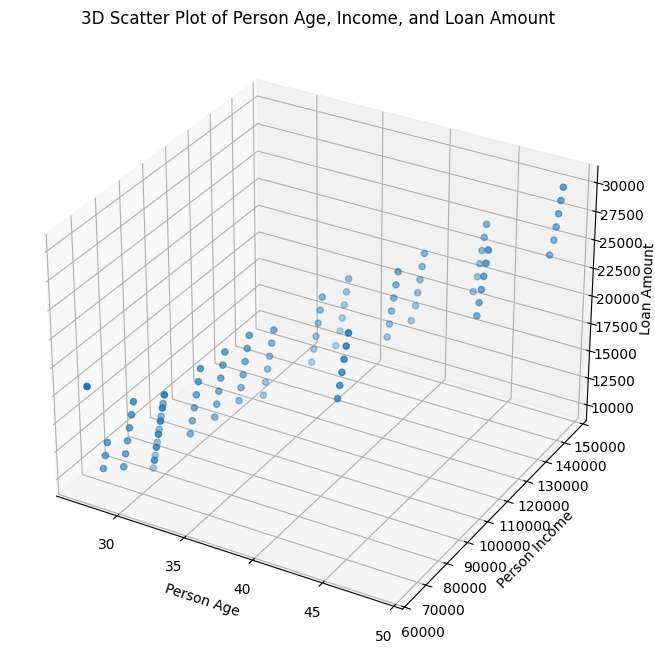

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['person_age'], df['person_income'], df['loan_amnt'])

ax.set_xlabel('Person Age')
ax.set_ylabel('Person Income')
ax.set_zlabel('Loan Amount')
ax.set_title('3D Scatter Plot of Person Age, Income, and Loan Amount')

plt.show()

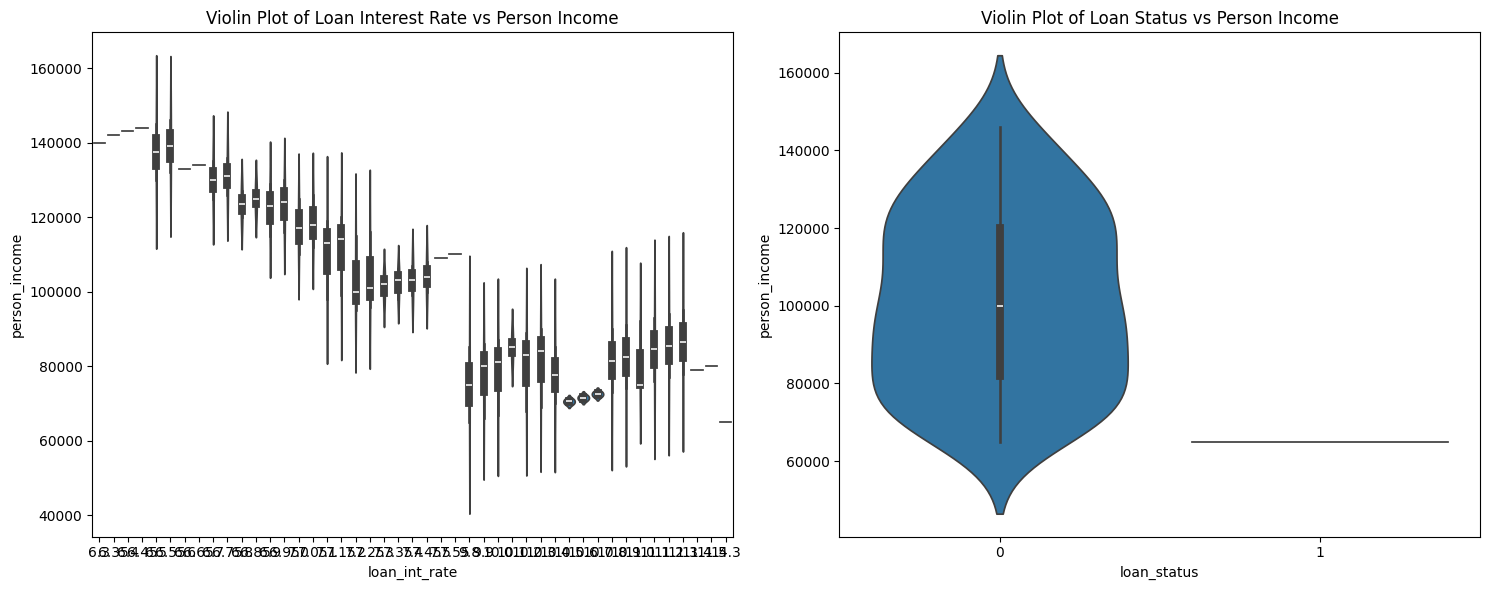

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.violinplot(x='loan_int_rate', y='person_income', data=df, ax=axes[0])
axes[0].set_title('Violin Plot of Loan Interest Rate vs Person Income')
sns.violinplot(x='loan_status', y='person_income', data=df, ax=axes[1])
axes[1].set_title('Violin Plot of Loan Status vs Person Income')
plt.tight_layout()
plt.show()

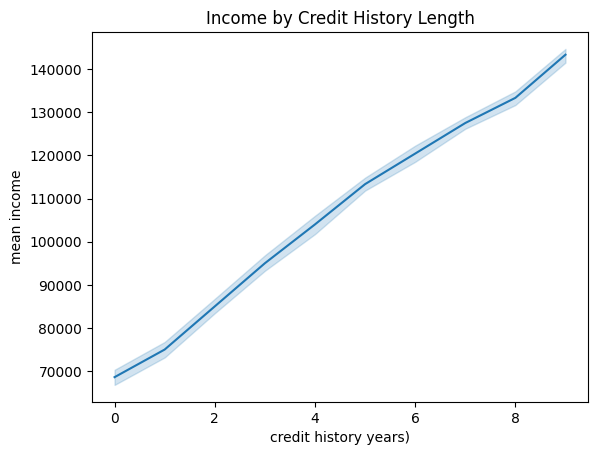

In [86]:
sns.lineplot(x='cb_person_cred_hist_length', y='person_income', data=df)
plt.title('Income by Credit History Length')
plt.xlabel('credit history years)')
plt.ylabel('mean income')
plt.show()


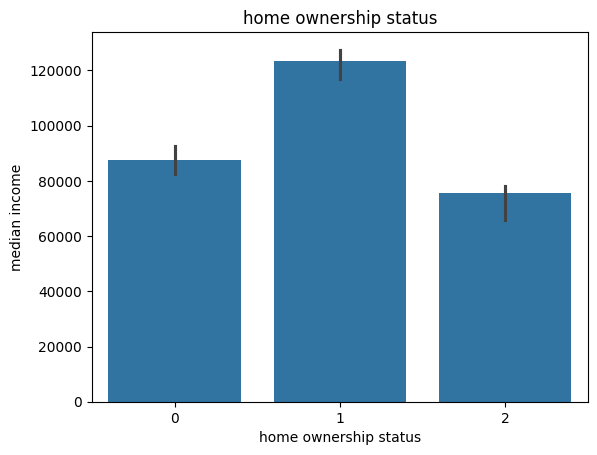

In [81]:
sns.barplot(x='person_home_ownership', y='person_income', data=df, estimator='median')
plt.title('home ownership status')
plt.xlabel('home ownership status')
plt.ylabel('median income')
plt.show()


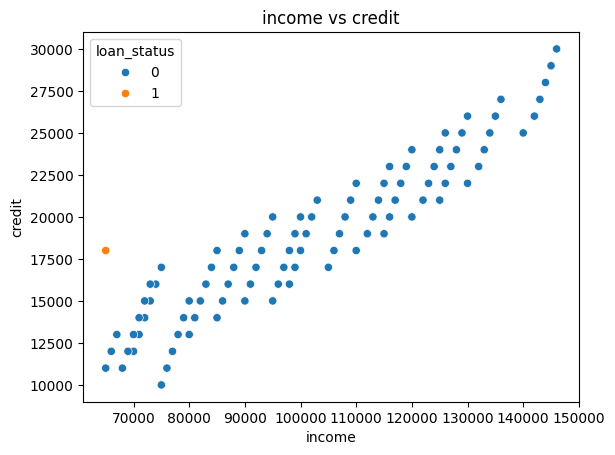

In [83]:
sns.scatterplot(x='person_income', y='loan_amnt', hue='loan_status', data=df)
plt.title('income vs credit')
plt.xlabel('income')
plt.ylabel('credit')
plt.show()


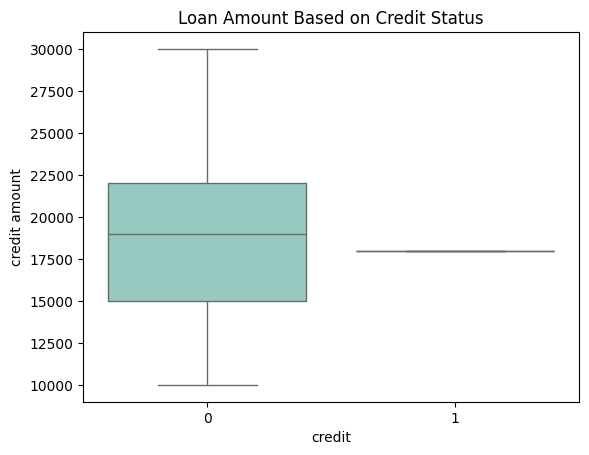

In [84]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df, palette='Set3')
plt.title('Loan Amount Based on Credit Status')
plt.xlabel('credit')
plt.ylabel('credit amount')
plt.show()


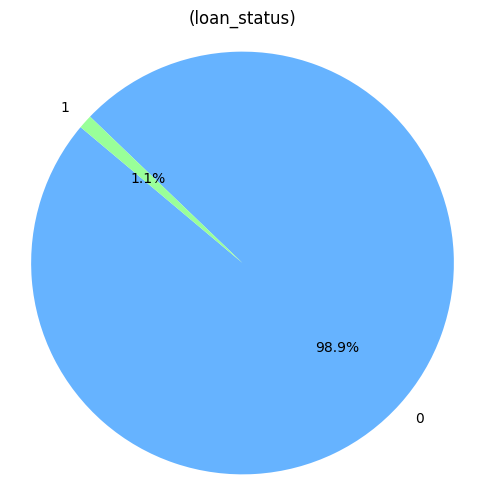

In [73]:
status_counts = df['loan_status'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('(loan_status)')
plt.axis('equal')
plt.show()


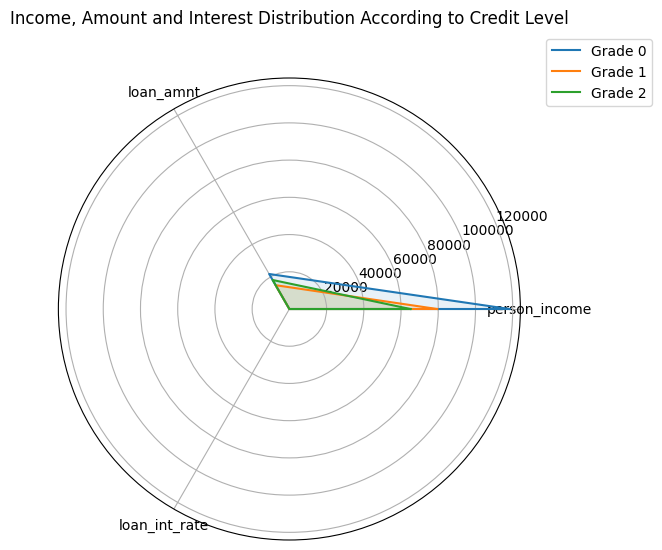

In [76]:
summary = df.groupby('loan_grade').agg({
    'person_income': 'mean',
    'loan_amnt': 'mean',
    'loan_int_rate': 'mean'
}).reset_index()
categories = ['person_income', 'loan_amnt', 'loan_int_rate']
grades = summary['loan_grade']
values = summary[categories].values

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for i, grade in enumerate(grades):
    data = values[i].tolist()
    data += data[:1]
    ax.plot(angles, data, label=f'Grade {grade}')
    ax.fill(angles, data, alpha=0.1)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
plt.title('Income, Amount and Interest Distribution According to Credit Level', y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.show()


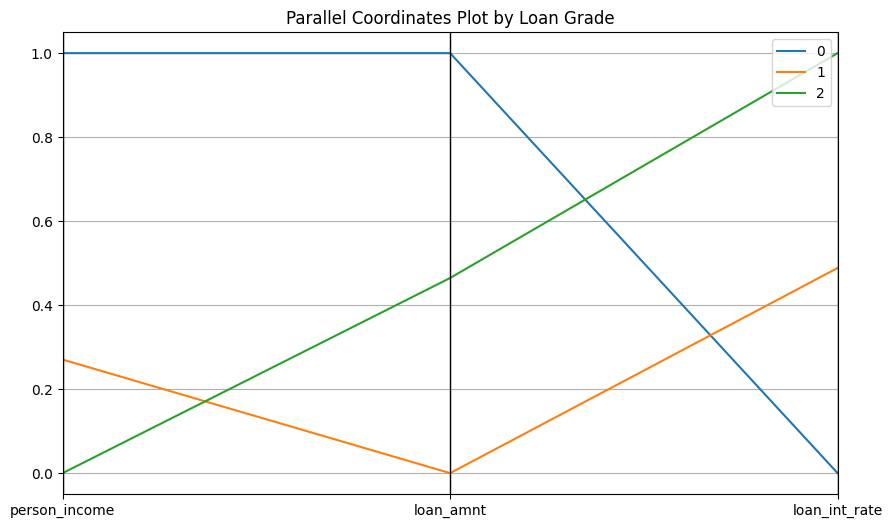

In [79]:
from pandas.plotting import parallel_coordinates
summary_scaled = summary.copy()
summary_scaled[categories] = (summary_scaled[categories] - summary_scaled[categories].min()) / \
                             (summary_scaled[categories].max() - summary_scaled[categories].min())
plt.figure(figsize=(10, 6))
parallel_coordinates(summary_scaled, 'loan_grade', color=plt.cm.tab10.colors)
plt.title('Parallel Coordinates Plot by Loan Grade')
plt.grid(True)
plt.show()

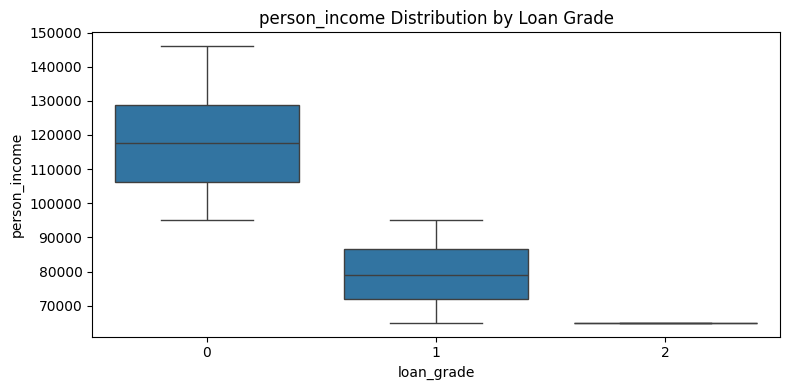

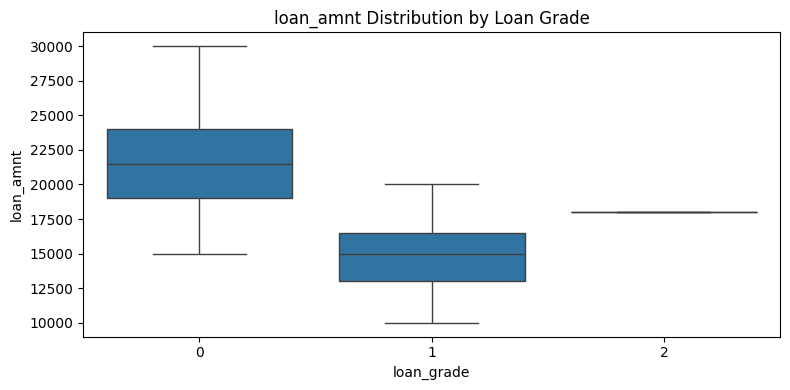

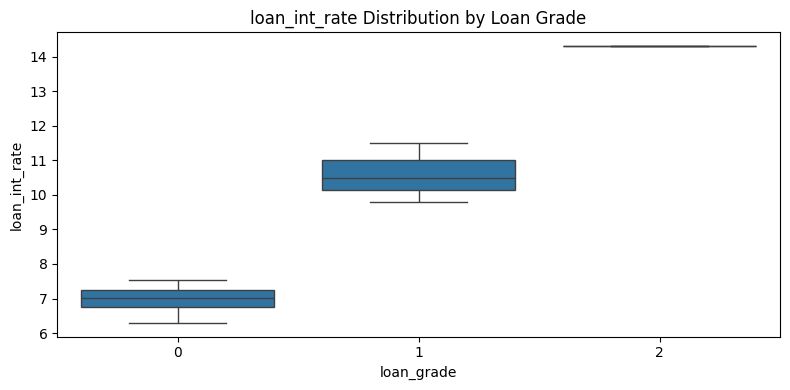

In [80]:
for col in categories:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='loan_grade', y=col)
    plt.title(f'{col} Distribution by Loan Grade')
    plt.tight_layout()
    plt.show()
